This is a dataset of a concrete compressive strength from UCI machine learning repository. It consist of input of array of (1030,8). The total number of instances is 1030 and the total number of features is 8. Here our job is predicting the concrete compressive strength from the input features. All the input features and the output label is continuous, so we will be heading towards the regression task. 

All the imports that we will use later.

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.style.use('seaborn-v0_8')

In [49]:
sns.set()

In [14]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
#print(concrete_compressive_strength.metadata) 
  
# variable information 
#print(concrete_compressive_strength.variables) 

In [15]:
X.shape

(1030, 8)

In [16]:
X.isna().any()

Cement                False
Blast Furnace Slag    False
Fly Ash               False
Water                 False
Superplasticizer      False
Coarse Aggregate      False
Fine Aggregate        False
Age                   False
dtype: bool

In [17]:
X.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


In [19]:
X.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [20]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Concrete compressive strength  1030 non-null   float64
dtypes: float64(1)
memory usage: 8.2 KB


In [21]:
features = X.columns
features

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

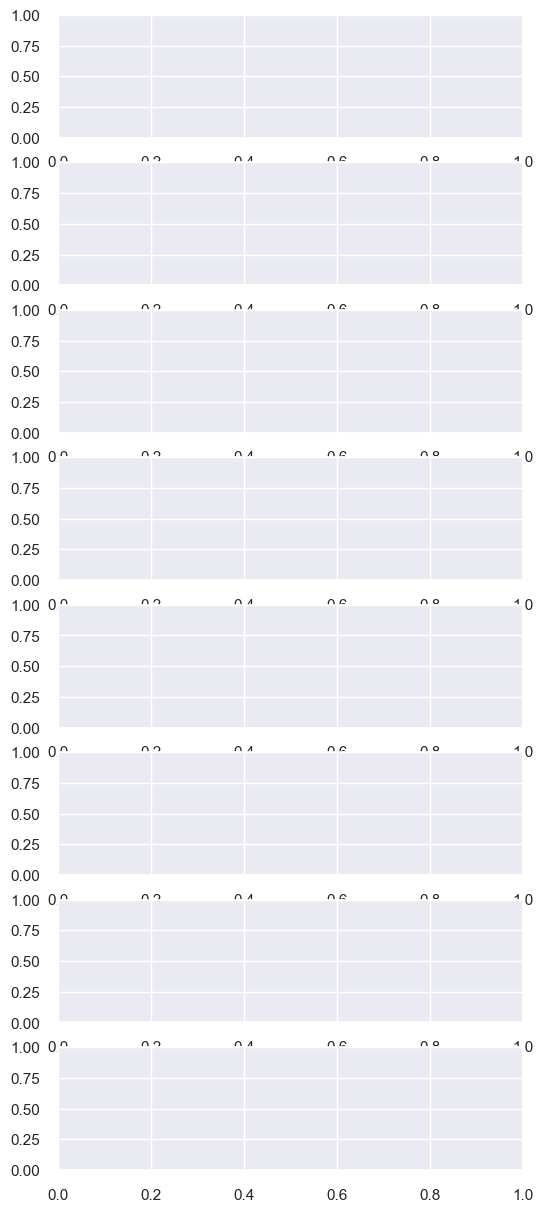

In [91]:
fig, ax= plt.subplots(nrows=8, ncols = 1, figsize = (6, 15))
for i, feature in enumerate(features):
    sns.boxplot(x = X[feature], ax = ax[i])
plt.tight_layout()
plt.show()

Here, we have boxplot of all the input features. The input features- cement, Water, Coarse Aggregate and Fine Aggregate seems to be normally distributed. Whereas the input features - Blast Furnance Slag, Fly Ash, and superplasticizer seems to be right skewed. 

In [59]:
df = pd.concat([X,y], axis = 1)

<Axes: >

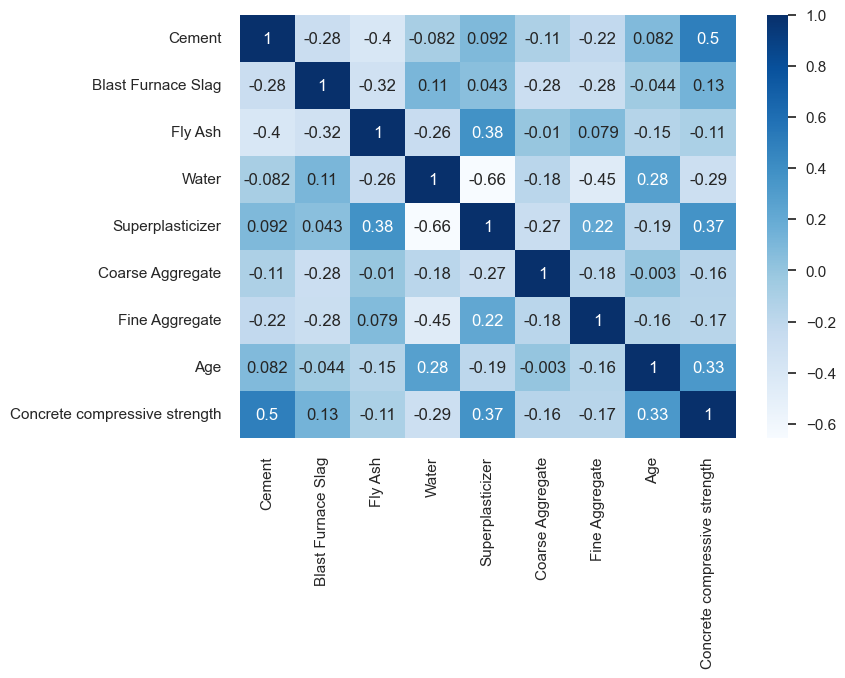

In [61]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

From out heatmap, it appears that there is slight or no correlation between the input features and between the input features and output. 

/Users/anilthapa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anilthapa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anilthapa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anilthapa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

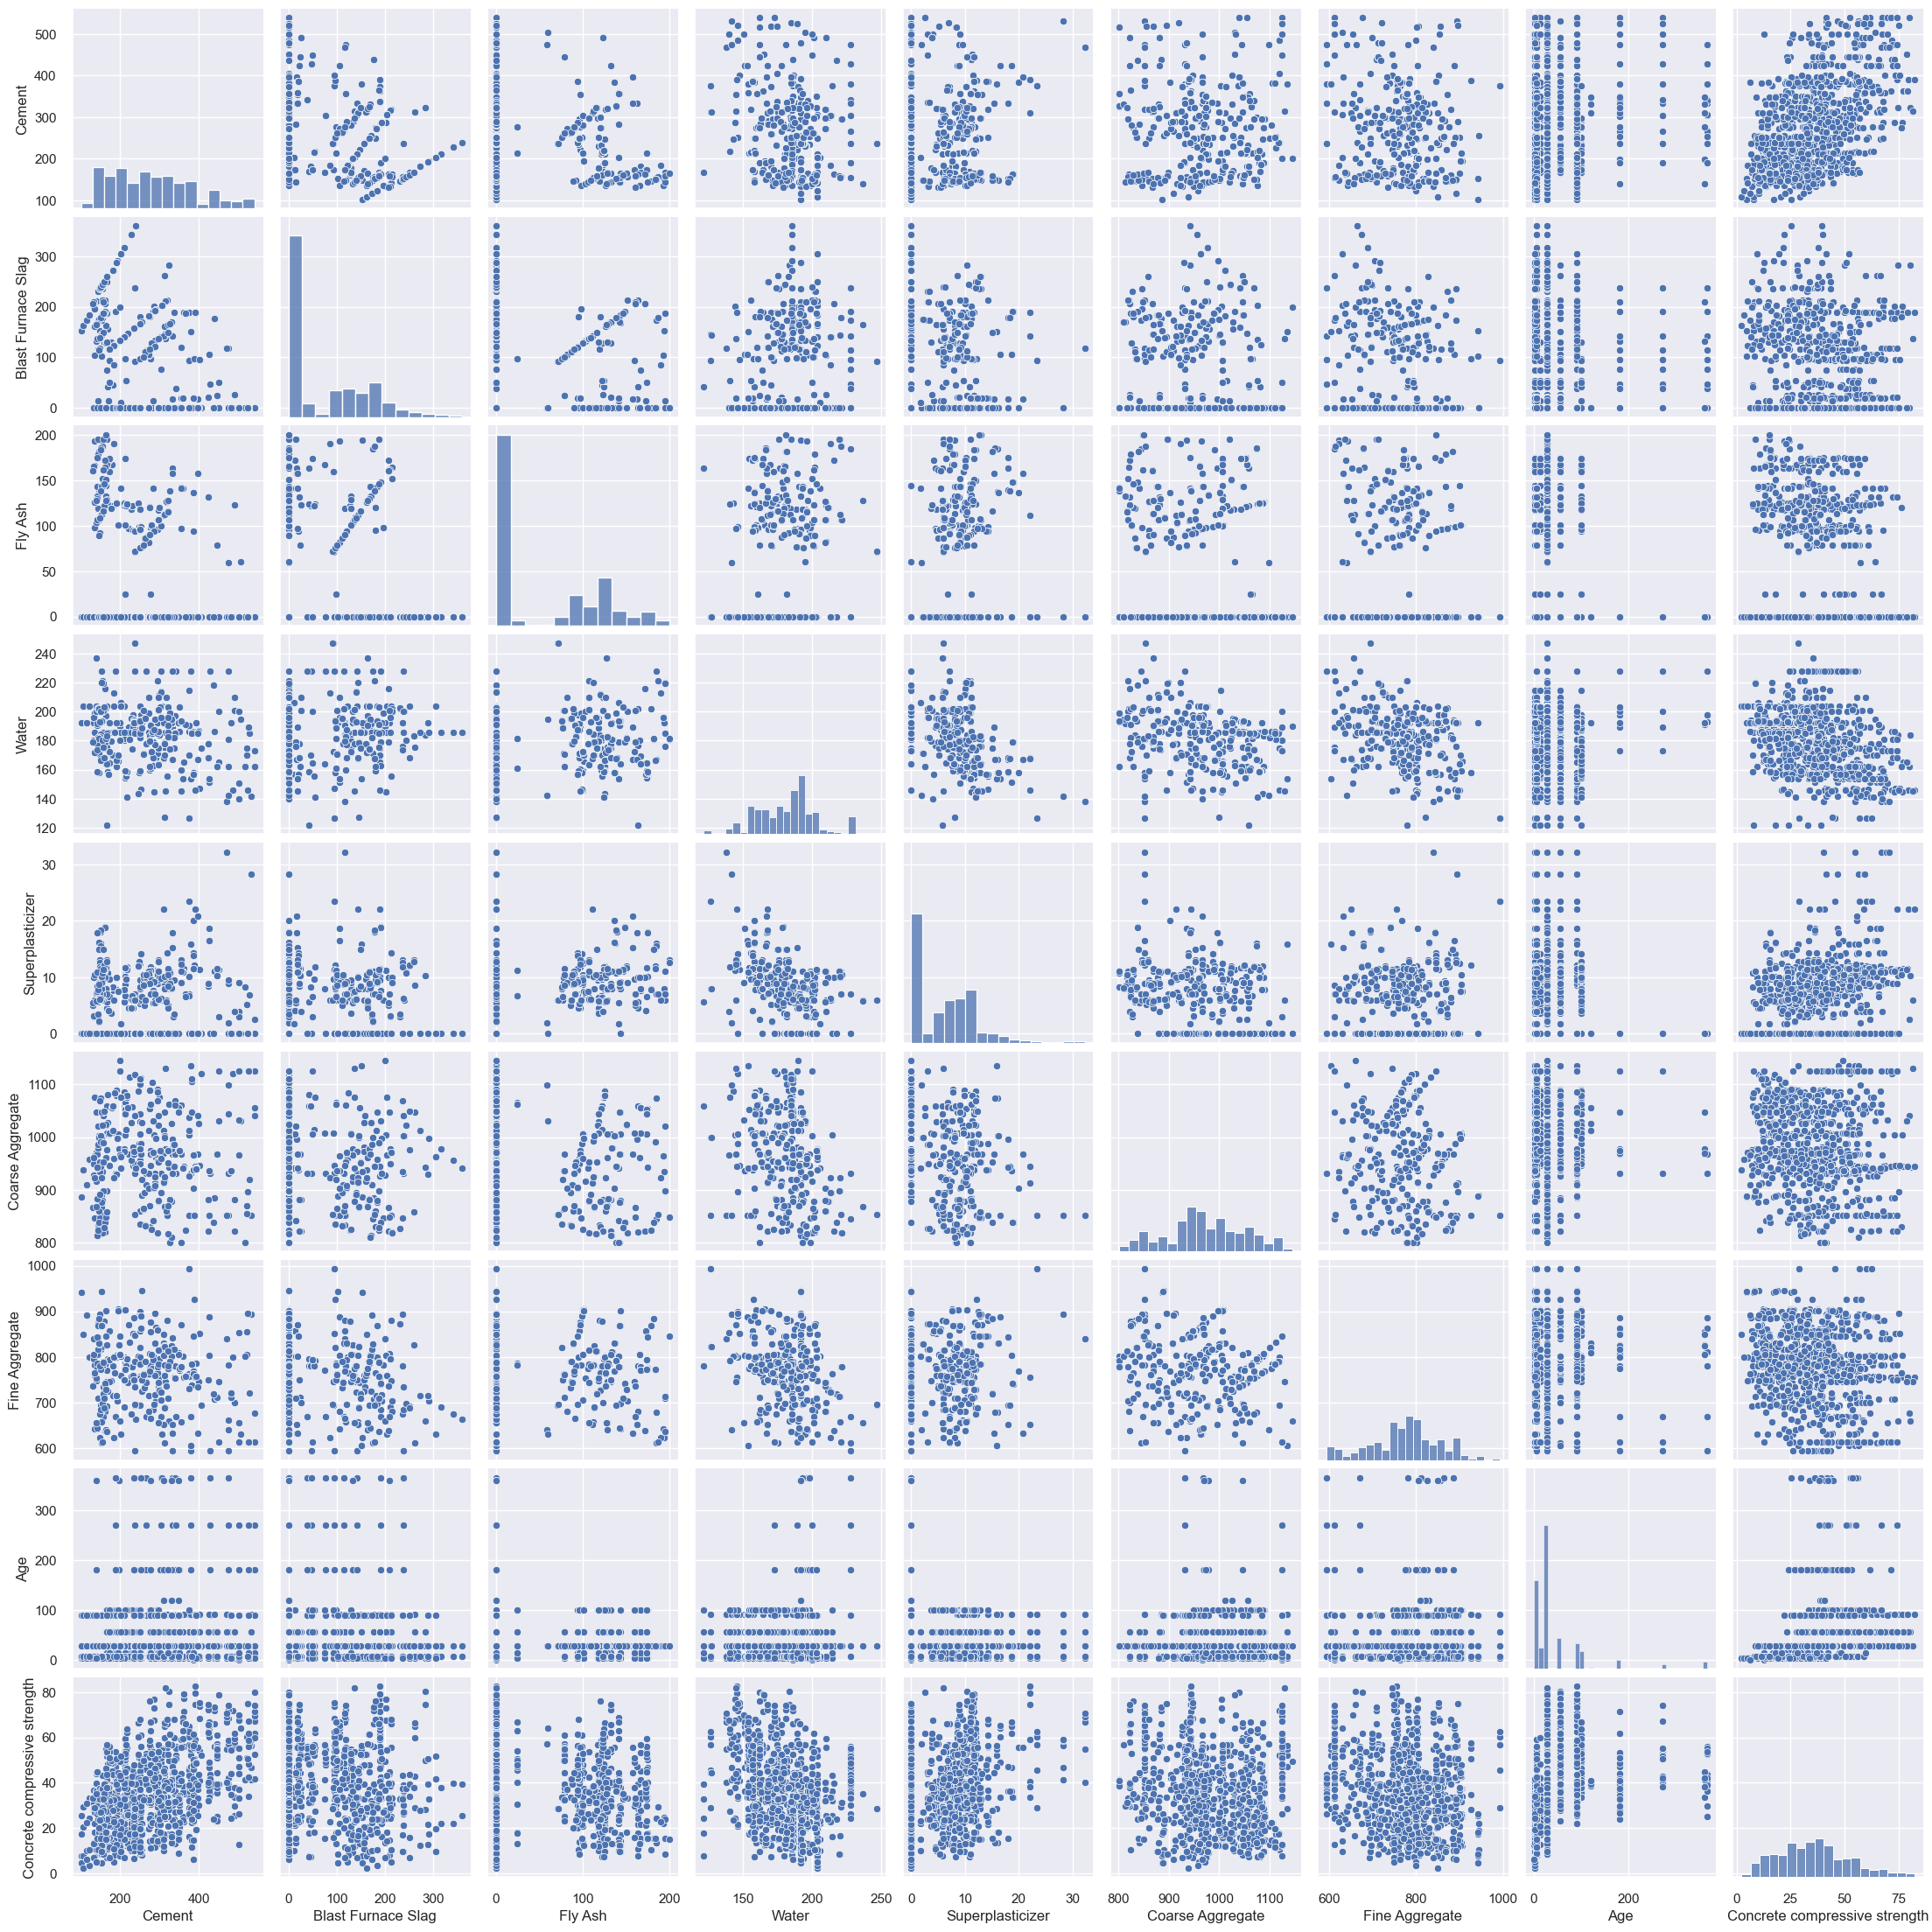

In [52]:

sns.pairplot(df)
plt.show()

From the pairplot, it seems there is more complex linear relationship between the target variables and the feature inpout. Visually, we cannot see any sort of pattern or relation between each individual feature and the output label.

/Users/anilthapa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


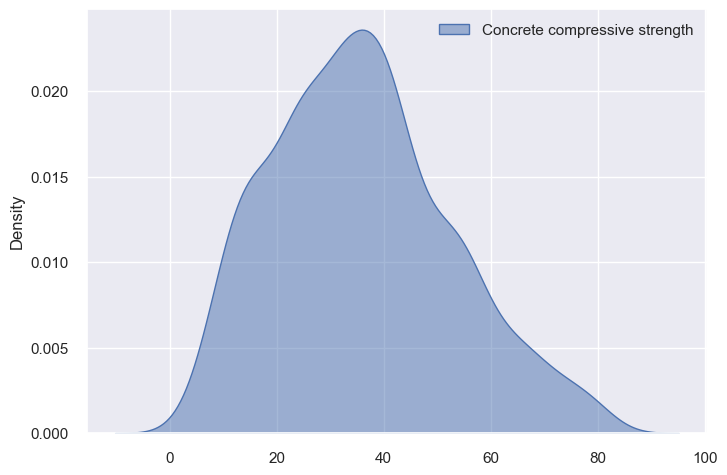

In [53]:
sns.kdeplot(y, fill=True, alpha = 0.5);plt.show()

#### Preprocessing 

In [55]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
X =scaler.fit_transform(X)

#### Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size =0.8)

## Importing and Predict the Model

### Section 1 - Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#### Simple Linear Regression

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict_lin = lin_reg.predict(X_test)

#### Ridge

In [98]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_predict_ridge = ridge.predict(X_test)

#### LASSO

In [77]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict_lasso = lasso.predict(X_test)

#### Elastic-Net

In [78]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_predict_elastic = elastic_net.predict(X_test)

#### Mean Squared Error

In [103]:
squared_error_lin = mean_squared_error(y_test, y_predict_lin)
squared_error_ridge = mean_squared_error(y_test, y_predict_ridge)
squared_error_lasso = mean_squared_error(y_test, y_predict_lasso)
squared_error_elastic = mean_squared_error(y_test, y_predict_elastic)

print('Mean Squared Error: \n')
print('Linear Regresssion:\t',squared_error_lin)
print('Ridge: \t\t\t', squared_error_ridge)
print('Lasso: \t\t\t', squared_error_lasso)
print('Elastic-Net:\t\t',squared_error_elastic)

Mean Squared Error: 

Linear Regresssion:	 95.97094009110684
Ridge: 			 95.96351301487105
Lasso: 			 112.46108901481058
Elastic-Net:		 125.2412441869377


#### Mean Absolute Error

In [105]:
absolute_error_lin = mean_absolute_error(y_test, y_predict_lin)
absolute_error_ridge = mean_absolute_error(y_test, y_predict_ridge)
absolute_error_lasso = mean_absolute_error(y_test, y_predict_lasso)
absolute_error_elastic = mean_squared_error(y_test, y_predict_elastic)

print('Absolute Mean Error: \n')
print('Linear Regresssion: \t',absolute_error_lin)
print('Ridge:\t\t\t', absolute_error_ridge)
print('Lasso: \t\t\t', absolute_error_lasso)
print('Elastic-Net:\t\t',absolute_error_elastic)

Absolute Mean Error: 

Linear Regresssion: 	 7.745559243921434
Ridge:			 7.751886759163161
Lasso: 			 8.720749905826043
Elastic-Net:		 125.2412441869377


### Section 2 - Support Vector Regressor

In [94]:
from sklearn.svm import SVR

In [117]:
svr = SVR(kernel='rbf', C=1, epsilon=0.1)

In [118]:
svr.fit(X_train, y_train.values.ravel())

SVR(C=1)

In [119]:
y_predict_svr = svr.predict(X_test)

#### Metrics

In [120]:
squared_error_svr = mean_squared_error(y_test, y_predict_svr)
absolute_error_svr = mean_absolute_error(y_test, y_predict_svr)

In [121]:
print('Support Vector Regression Error')
print('Squared Error: ', squared_error_svr)
print('Absolute Error: ', absolute_error_svr)

Support Vector Regression Error
Squared Error:  90.71180495992122
Absolute Error:  7.567220721921534


#### GridSearch for params

In [122]:
from sklearn.model_selection import GridSearchCV

In [125]:
params_grid = {
    'kernel':['linear', 'poly','rbf'],
    'C':[1, 5, 10],
    'epsilon':[0.01, 0.1, 0.5]
}

In [128]:
grid_search = GridSearchCV(estimator=svr, param_grid=params_grid, cv = 5, scoring ='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVR(C=1),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_squared_error')

In [130]:
best_params = grid_search.best_params_
best_params

{'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}

In [131]:
best_estimator = grid_search.best_estimator_
best_estimator

SVR(C=10, epsilon=0.01)

In [133]:
y_predict_grid_search = best_estimator.predict(X_test)
print('Accuracy Using Grid Search for our Params')
print('Mean Squared Error: ', mean_squared_error(y_test, y_predict_grid_search))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predict_grid_search))

Accuracy Using Grid Search for our Params
Mean Squared Error:  52.41487457937579
Mean Absolute Error:  5.328786711306184


It appears that the both the mean squared error and mean absolute error reduced when we find the best parameter using grid search

### Section 3 - Decision Trees Regression

Here, we use ensembling method to find out the strength of a concrete using Gradient Boosting Method. We could also use Random Forest Regression which uses ensembling techniques, but boosting results in slighly higher predictive accuracy given that it can be computationally expensive.

In [144]:
from sklearn.ensemble import GradientBoostingRegressor

In [145]:
boosting_reg = GradientBoostingRegressor()

In [147]:
boosting_reg.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor()

In [148]:
y_predict_boost = boosting_reg.predict(X_test)

#### Metrics

In [150]:
mean_absolute_error(y_predict, y_predict_boost)
mean_squared_error(y_predict, y_predict_boost)

75.86101114324505

In [151]:
print('Gradient Boosting Regressor Error: ')
print('Mean Squared Error: ', mean_squared_error(y_test, y_predict_boost))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predict_boost))

Gradient Boosting Regressor Error: 
Mean Squared Error:  30.031894833903184
Mean Absolute Error:  4.132734106121848


#### Grid Search for params

In [153]:
params_grid = {
    'n_estimators': [50,100,150,200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3,5,7,9]
}

In [154]:
grid_search_boost = GridSearchCV(estimator = boosting_reg, param_grid = params_grid, cv = 5, scoring='neg_mean_squared_error', verbose = 1, n_jobs = -1)

In [156]:
grid_search_boost.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [157]:
grid_search_boost.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [158]:
y_predict_grid_search_boosting = grid_search_boost.estimator.predict(X_test)

In [159]:
print('Grid Search Gradient Boosting: ')
print('Mean Squared Error: ', mean_squared_error(y_test, y_predict_grid_search_boosting))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predict_grid_search_boosting))

Grid Search Gradient Boosting: 
Mean Squared Error:  30.031894833903184
Mean Absolute Error:  4.132734106121848
